<a href="https://colab.research.google.com/github/lugiiing/test-reposit/blob/main/%EC%98%81%ED%99%94%EA%B4%80%EA%B0%9D%EC%98%88%EC%B8%A1_%EC%97%85%EB%A1%9C%EB%93%9C%ED%85%8C%EC%8A%A4%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 임포트

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

train = pd.read_csv('/movies_train.csv')
test = pd.read_csv('/movies_test.csv')
submission = pd.read_csv('/submission.csv')

# EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


In [ ]:
pd.reset_option('display.float_format')

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [ ]:
import seaborn as sns

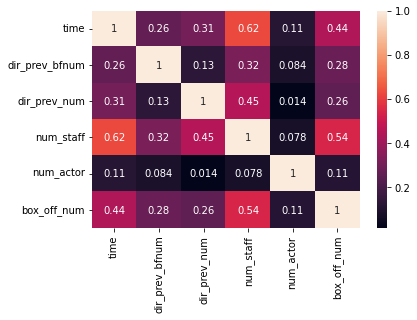

In [ ]:
sns.heatmap(train.corr(), annot = True)

# 전처리

In [ ]:
"""# 감독명 : 너무 다양해서 제거 -> 안해!!
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)"""

"# 감독명 : 너무 다양해서 제거 -> 안해!!\ntrain = train.drop(['director'],axis = 1)\ntest = test.drop(['director'],axis = 1)"

In [ ]:
train['director'].nunique()
# 전체가 600개인데 감독명이 472면 의미가 없는건가,,?

472

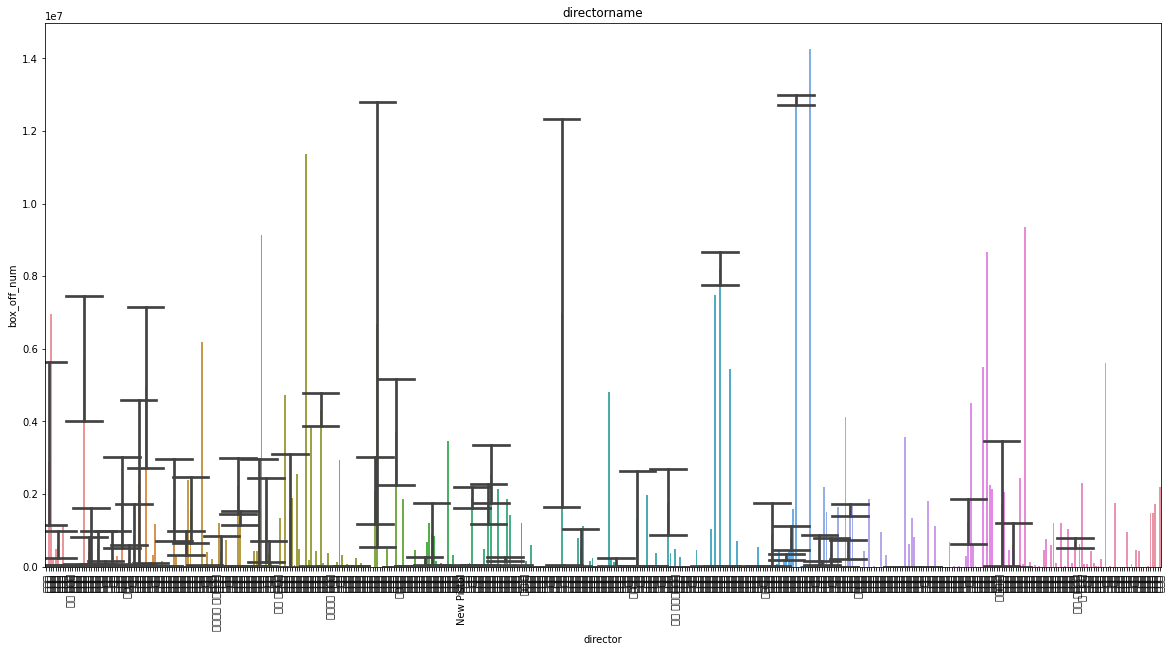

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


figure, ax = plt.subplots()
figure.set_size_inches(20, 10)
sns.barplot(x='director', y='box_off_num', data=train, capsize = 15)
ax.set(title = 'directorname', 
      xlabel = 'director', 
      ylabel = 'box_off_num')
ax.tick_params(axis = 'x', labelrotation = 90)
# 감독명도 꽤나 의미 있어보이는데..?

# 질문!

In [ ]:
"""# 결측치가 많은 데이터 제거 -> 하지 않고 결측치 1사분위수의 절반으로(하려고 했으나 구하기 어려워서 일단 0으로): 이전에 참여한 영화 개수가 0이라서 관객수 결측치인것이기 때문에 
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)"""

"# 결측치가 많은 데이터 제거 -> 하지 않고 결측치 1사분위수의 절반으로(하려고 했으나 구하기 어려워서 일단 0으로): 이전에 참여한 영화 개수가 0이라서 관객수 결측치인것이기 때문에 \ntrain = train.drop(['dir_prev_bfnum'],axis = 1)\ntest =  test.drop(['dir_prev_bfnum'],axis = 1)"

In [ ]:
"""train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()
# 테스트도 마찬가지임"""

"train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()\n# 테스트도 마찬가지임"

In [ ]:
"""train['dir_prev_bfnum'].fillna(0, inplace = True)
test['dir_prev_bfnum'].fillna(0, inplace = True)"""

"train['dir_prev_bfnum'].fillna(0, inplace = True)\ntest['dir_prev_bfnum'].fillna(0, inplace = True)"

In [ ]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [ ]:
train['title']

0         개들의 전쟁
1           내부자들
2      은밀하게 위대하게
3       나는 공무원이다
4           불량남녀
         ...    
595           해무
596         파파로티
597        살인의 강
598       악의 연대기
599          베를린
Name: title, Length: 600, dtype: object

In [ ]:
## 나중에 제목 글자 수 같은걸로 의미를 찾아볼 수 있지 않을까?

train['titlecount'] = train['title'].apply(lambda x: len(x))
train['titlecount']

0      6
1      4
2      9
3      8
4      4
      ..
595    2
596    4
597    5
598    6
599    3
Name: titlecount, Length: 600, dtype: int64

In [ ]:
test['titlecount'] = test['title'].apply(lambda x: len(x))
test['titlecount']

0       6
1      11
2       3
3       3
4       5
       ..
238     9
239     6
240     4
241     9
242    15
Name: titlecount, Length: 243, dtype: int64

In [ ]:
# 제목 자체는 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

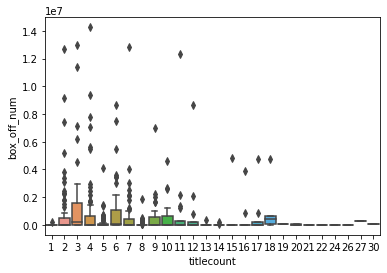

In [ ]:
import seaborn as sns

sns.boxplot(data=train, x='titlecount', y= 'box_off_num')

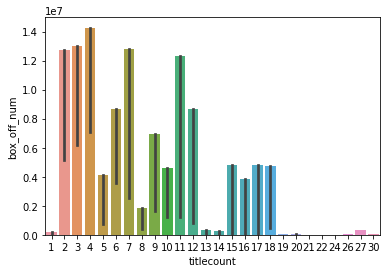

In [ ]:
import numpy as np

sns.barplot(data=train, x='titlecount', y= 'box_off_num', estimator=np.max)

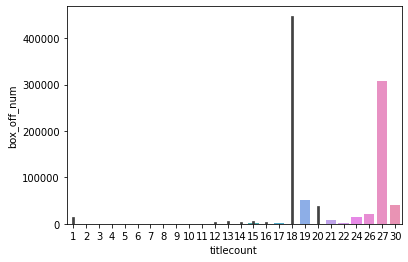

In [ ]:
import seaborn as sns

sns.barplot(data=train, x='titlecount', y= 'box_off_num', estimator=np.min)

In [ ]:
train = train.drop(['titlecount'], axis = 1)
test = test.drop(['titlecount'], axis = 1)

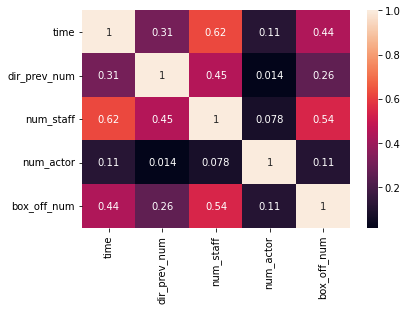

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [ ]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))


In [ ]:
# 마지막주 수요일 문화의 날 -> 문화의 날 10일 전쯤 개봉한영화와 아닌 영화 분류
train['release_time']

# 대충 '일' 피쳐에서 20일 이상인 것들로 분류 -> 0, 1 이진으로 (아래에서, df로 합친 후)

0      2012-11-22
1      2015-11-19
2      2013-06-05
3      2012-07-12
4      2010-11-04
          ...    
595    2014-08-13
596    2013-03-14
597    2010-09-30
598    2015-05-14
599    2013-01-30
Name: release_time, Length: 600, dtype: object

In [ ]:
# 개봉일을 바탕으로 년,월, 일 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
#train['일'] = train['release_time'].apply(lambda x: int(x[8:]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
#test['일'] = test['release_time'].apply(lambda x: int(x[8:]))
test =  test.drop(['release_time'],axis = 1)


In [ ]:
"""for i in df.index:
  print(df['일'][i])"""
  # df로 밑에서 하니까 인덱스 train test 겹쳐서 합치기 전에 처리하기로

"for i in df.index:\n  print(df['일'][i])"

In [ ]:
"""# 문화가 있는 수요일, 2014년부터

cult_wed = []

for i in train.index:
  if train['일'][i] >= 20 and train['년'][i] >= 2014:
    cw = 1
    cult_wed.append(cw)
    
  else:
    cw = 0
    cult_wed.append(cw)

train['cult_wed'] = cult_wed

# 일 자체는 제거 
train = train.drop(['일'],axis= 1)


# ---test도 똑같이-----

cult_wed = []

for i in test.index:
  if test['일'][i] >= 20 and test['년'][i] >= 2014:
    cw = 1
    cult_wed.append(cw)
    
  else:
    cw = 0
    cult_wed.append(cw)

test['cult_wed'] = cult_wed

# 일 자체는 제거 
test = test.drop(['일'],axis= 1)"""

"# 문화가 있는 수요일, 2014년부터\n\ncult_wed = []\n\nfor i in train.index:\n  if train['일'][i] >= 20 and train['년'][i] >= 2014:\n    cw = 1\n    cult_wed.append(cw)\n    \n  else:\n    cw = 0\n    cult_wed.append(cw)\n\ntrain['cult_wed'] = cult_wed\n\n# 일 자체는 제거 \ntrain = train.drop(['일'],axis= 1)\n\n\n# ---test도 똑같이-----\n\ncult_wed = []\n\nfor i in test.index:\n  if test['일'][i] >= 20 and test['년'][i] >= 2014:\n    cw = 1\n    cult_wed.append(cw)\n    \n  else:\n    cw = 0\n    cult_wed.append(cw)\n\ntest['cult_wed'] = cult_wed\n\n# 일 자체는 제거 \ntest = test.drop(['일'],axis= 1)"

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distributor    600 non-null    object
 1   genre          600 non-null    object
 2   time           600 non-null    int64 
 3   screening_rat  600 non-null    object
 4   director       600 non-null    object
 5   dir_prev_num   600 non-null    int64 
 6   num_staff      600 non-null    int64 
 7   num_actor      600 non-null    int64 
 8   box_off_num    600 non-null    int64 
 9   년              600 non-null    int64 
 10  월              600 non-null    int64 
dtypes: int64(7), object(4)
memory usage: 51.7+ KB


In [ ]:
df = pd.concat([train, test], axis = 0, join = 'outer') 

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distributor    843 non-null    object 
 1   genre          843 non-null    object 
 2   time           843 non-null    int64  
 3   screening_rat  843 non-null    object 
 4   director       843 non-null    object 
 5   dir_prev_num   843 non-null    int64  
 6   num_staff      843 non-null    int64  
 7   num_actor      843 non-null    int64  
 8   box_off_num    600 non-null    float64
 9   년              843 non-null    int64  
 10  월              843 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 79.0+ KB


In [ ]:
# 디렉터 인코딩 _ 레이블인코딩
# 트레인 테스트에서 각각 1번 감독이 생기는 것을 방지하기 위해 합쳐서 인코딩 하고 다시 가르기
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['director1'] = le.fit_transform(df['director'])


0       91
1      387
2      343
3       20
4      251
      ... 
595    510
596    286
597    123
598    431
599    363
Name: num_staff, Length: 600, dtype: int64
82.5


0      3
1      4
2      4
3      2
4      3
      ..
238    1
239    2
240    3
241    2
242    1
Name: grade_num_staff, Length: 843, dtype: int64

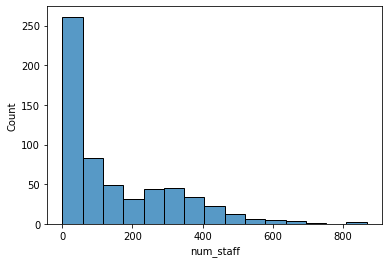

In [ ]:
# 스텝 수 중요도 높음 -> 파생 피처 추가
print(train['num_staff'])

print(train['num_staff'].median())
sns.histplot(data = train, x = 'num_staff')

# 로그변환 할까 했는데, 이미 중요도가 높아서 그대로 두고 파생 피쳐만 추가: 구간 만들어서 넣어주기

Q1 = df['num_staff'].quantile(.25)
Q3 = df['num_staff'].quantile(.75)
Q2 = df['num_staff'].quantile(.5)
Q4 = df['num_staff'].quantile(1)

grade_num_staff = []

for i in df['num_staff']:
  if i <= Q1:
    gns = 1
    grade_num_staff.append(gns)
  elif i > Q1 and i <= Q2:
    gns = 2
    grade_num_staff.append(gns)
  elif i > Q2 and i <= Q3:
    gns = 3
    grade_num_staff.append(gns)
  else: 
    gns = 4
    grade_num_staff.append(gns)

df['grade_num_staff'] = grade_num_staff

df['grade_num_staff']
  

In [ ]:
# 러닝타임 중요도 높음 -> 얘는 추가 안하고 그냥 둘래.. 피쳐 수랑 러닝타임이랑 피쳐 상관관계 높아서

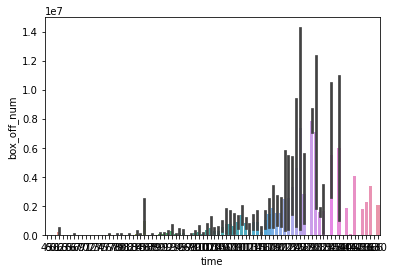

In [ ]:
import seaborn as sns

sns.barplot(data=train, x='time', y= 'box_off_num')

In [ ]:
# 월 -> 시계열 순환 -> 계절피쳐 추가

season = []

for i in df['월']:
  if i == 12 or i == 1 or i == 2:
    ss = 4
    season.append(ss)
  elif i == 3 or i == 4 or i == 5:
    ss = 1
    season.append(ss)
  elif i == 6 or i == 7 or i == 8:
    ss = 2
    season.append(ss)
  elif i == 9 or i == 10 or i == 11:
    ss = 3
    season.append(ss)

df['season'] = season

df['season']

0      3
1      3
2      2
3      2
4      3
      ..
238    3
239    3
240    3
241    3
242    3
Name: season, Length: 843, dtype: int64

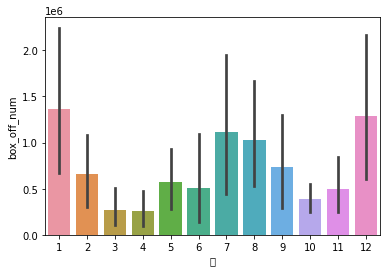

In [ ]:
import seaborn as sns

sns.barplot(data=train, x='월', y= 'box_off_num')

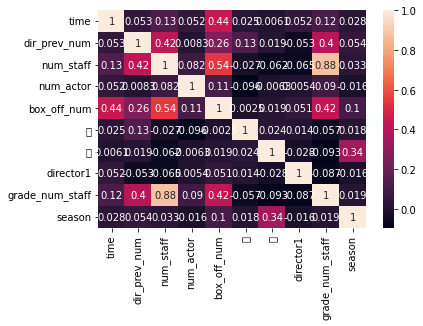

In [ ]:
sns.heatmap(df.corr(), annot = True)

# 월을 계절으로 바꾸니까 중요도 훨씬 올라감

In [ ]:
train = df.iloc[:600]
test = df.iloc[600:]

In [ ]:
train.drop(['director'],axis= 1)
test.drop(['director'],axis= 1)

train['director'] = train['director1']
test['director'] = test['director1']

train.drop(['director1'],axis= 1, inplace = True)
test.drop(['director1'],axis= 1, inplace = True)

train

,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num,년,월,grade_num_staff,season
0,롯데엔터테인먼트,액션,96,청소년 관람불가,517,0,91,2,23398.0,2012,11,3,3
1,(주)쇼박스,느와르,130,청소년 관람불가,327,2,387,3,7072501.0,2015,11,4,3
2,(주)쇼박스,액션,123,15세 관람가,467,4,343,4,6959083.0,2013,6,4,2
3,(주)NEW,코미디,101,전체 관람가,26,2,20,6,217866.0,2012,7,2,2
4,기타,코미디,108,15세 관람가,282,1,251,2,483387.0,2010,11,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,(주)NEW,드라마,111,청소년 관람불가,296,1,510,7,1475091.0,2014,8,4,2
596,(주)쇼박스,드라마,127,15세 관람가,347,1,286,6,1716438.0,2013,3,4,1
597,(주)마운틴픽쳐스,공포,99,청소년 관람불가,58,0,123,4,2475.0,2010,9,3,3
598,CJ 엔터테인먼트,느와르,102,15세 관람가,252,0,431,4,2192525.0,2015,5,4,1


In [ ]:
test.drop(['box_off_num'], axis = 1, inplace = True)

test

,distributor,genre,time,screening_rat,director,dir_prev_num,num_staff,num_actor,년,월,grade_num_staff,season
0,기타,느와르,125,청소년 관람불가,147,2,304,3,2010,1,4,4
1,(주)쇼박스,멜로/로맨스,113,12세 관람가,353,4,275,3,2010,1,4,4
2,CJ 엔터테인먼트,드라마,115,12세 관람가,1,3,419,7,2010,1,4,4
3,(주)쇼박스,액션,116,15세 관람가,470,2,408,2,2010,2,4,4
4,CJ 엔터테인먼트,공포,110,15세 관람가,38,1,380,1,2010,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
238,기타,드라마,78,15세 관람가,302,1,4,4,2015,11,1,3
239,기타,다큐멘터리,86,12세 관람가,394,0,18,2,2015,10,2,3
240,기타,느와르,107,청소년 관람불가,303,0,224,4,2015,10,3,3
241,기타,드라마,102,청소년 관람불가,273,1,68,7,2015,10,2,3


In [ ]:
"""# 디렉터 인코딩 _ 레이블인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['director1'] = le.fit_transform(train['director'])
test['director1'] = le.fit_transform(test['director'])"""

# 이렇게 인코딩하면 감독명을 살릴수는 있는데 트레인 데이터랑 테스트 데이터의 감독명이 똑같은 1번이어도 막상 까보면 다를텐데..?
# 트레인 테스트 합쳐서 인코딩하는 방법은 없을까..? 나누기 전에 하면 되지?!! 아 이미 나눠져있구나
# 둘다 원핫으로 하면 되지만 그러면 감독 명 개수가 차이나서 안되던데..?

"# 디렉터 인코딩 _ 레이블인코딩\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ntrain['director1'] = le.fit_transform(train['director'])\ntest['director1'] = le.fit_transform(test['director'])"

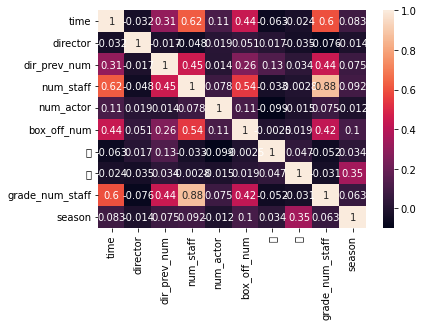

In [ ]:
sns.heatmap(train.corr(), annot = True)

In [ ]:
# 원핫 인코딩
train1 = train.drop(['director'],axis = 1)
train2 = pd.get_dummies(train1) 
train2['director'] =  train['director']
train = train2

test1 = test.drop(['director'],axis = 1)
test2 = pd.get_dummies(test1) 
test2['director'] =  test['director']
test = test2

In [ ]:
train.head()

,time,dir_prev_num,num_staff,num_actor,box_off_num,년,월,grade_num_staff,season,distributor_(주)NEW,...,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,director
0,96,0,91,2,23398.0,2012,11,3,3,0,...,0,0,0,1,0,0,0,0,1,517
1,130,2,387,3,7072501.0,2015,11,4,3,0,...,0,0,0,0,0,0,0,0,1,327
2,123,4,343,4,6959083.0,2013,6,4,2,0,...,0,0,0,1,0,0,1,0,0,467
3,101,2,20,6,217866.0,2012,7,2,2,1,...,0,0,0,0,1,0,0,1,0,26
4,108,1,251,2,483387.0,2010,11,3,3,0,...,0,0,0,0,1,0,1,0,0,282


In [ ]:
test.head()

,time,dir_prev_num,num_staff,num_actor,년,월,grade_num_staff,season,distributor_(주)NEW,distributor_(주)마운틴픽쳐스,...,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디,screening_rat_12세 관람가,screening_rat_15세 관람가,screening_rat_전체 관람가,screening_rat_청소년 관람불가,director
0,125,2,304,3,2010,1,4,4,0,0,...,0,0,0,0,0,0,0,0,1,147
1,113,4,275,3,2010,1,4,4,0,0,...,0,0,0,0,0,1,0,0,0,353
2,115,3,419,7,2010,1,4,4,0,0,...,0,0,0,0,0,1,0,0,0,1
3,116,2,408,2,2010,2,4,4,0,0,...,0,0,0,1,0,0,1,0,0,470
4,110,1,380,1,2010,2,4,4,0,0,...,0,0,0,0,0,0,1,0,0,38


In [ ]:
train = train.drop(['director'], axis = 1)
test = test.drop(['director'], axis = 1)

# 모델 정의, 학습_싱글

In [ ]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

NameError: ignored

In [ ]:
X_train = train.drop(['box_off_num'],axis= 1)
X_test = test
y_train = train['box_off_num']

In [ ]:
model.fit(X_train,y_train)

In [ ]:
singleLGBM = submission.copy()

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [ ]:
singleLGBM.head()

In [ ]:
singleLGBM.to_csv('singleLGBM.csv', index = False)

# 모델 정의, 학습_교차검증

In [ ]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits = 5, shuffle = True, random_state = 777)

In [ ]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[train_idx]
  y_val = y_train.iloc[train_idx]

  models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 7.86197e+11
[200]	valid_0's l2: 4.76497e+11
[300]	valid_0's l2: 3.21611e+11
[400]	valid_0's l2: 2.34425e+11
[500]	valid_0's l2: 1.81082e+11
[600]	valid_0's l2: 1.37029e+11
[700]	valid_0's l2: 1.05749e+11
[800]	valid_0's l2: 8.23411e+10
[900]	valid_0's l2: 6.56595e+10
[1000]	valid_0's l2: 5.216e+10
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 5.216e+10
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 5.44364e+11
[200]	valid_0's l2: 2.75198e+11
[300]	valid_0's l2: 1.64558e+11
[400]	valid_0's l2: 1.08189e+11
[500]	valid_0's l2: 7.74477e+10
[600]	valid_0's l2: 5.59971e+10
[700]	valid_0's l2: 4.14656e+10
[800]	valid_0's l2: 3.10194e+10
[900]	valid_0's l2: 2.32954e+10
[1000]	valid_0's l2: 1.74352e+10
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.74352e+10
Training until validation scores don't improve for 100 rounds.
[100]	valid

In [ ]:
preds = []

for model in models:
  preds.append(model.predict(X_test))

len(preds)

5

In [ ]:
kfLGBM = submission.copy()

In [ ]:
import numpy as np

kfLGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
kfLGBM.to_csv('kfLGBM.csv', index = False)

# 모델 정의, 학습_모델 튜닝(그리드서치)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'learning_rate': [0.1, 0.01, 0.005], 
    'min_child_samples': [20, 30]
}

gs = GridSearchCV(estimator = model, 
                  param_grid = params, 
                  scoring = 'neg_mean_squared_error', 
                  cv = k_fold)

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.005],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'learning_rate': 0.005, 'min_child_samples': 30}

In [ ]:
model = lgb.LGBMRegressor(random_state = 777, n_estimators = 1000, learning_rate= 0.005, min_child_samples= 30)

models = []

for train_idx, val_idx in k_fold.split(X_train):
  x_t = X_train.iloc[train_idx]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[train_idx]
  y_val = y_train.iloc[train_idx]

  models.append(model.fit(x_t, y_t, eval_set = (x_val, y_val), early_stopping_rounds = 100, verbose = 100))

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.48878e+12
[200]	valid_0's l2: 2.10693e+12
[300]	valid_0's l2: 1.91046e+12
[400]	valid_0's l2: 1.80358e+12
[500]	valid_0's l2: 1.72233e+12
[600]	valid_0's l2: 1.64458e+12
[700]	valid_0's l2: 1.55182e+12
[800]	valid_0's l2: 1.48009e+12
[900]	valid_0's l2: 1.42053e+12
[1000]	valid_0's l2: 1.37463e+12
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.37463e+12
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2.01409e+12
[200]	valid_0's l2: 1.70463e+12
[300]	valid_0's l2: 1.55409e+12
[400]	valid_0's l2: 1.45596e+12
[500]	valid_0's l2: 1.38425e+12
[600]	valid_0's l2: 1.32979e+12
[700]	valid_0's l2: 1.27988e+12
[800]	valid_0's l2: 1.21837e+12
[900]	valid_0's l2: 1.15775e+12
[1000]	valid_0's l2: 1.10808e+12
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l2: 1.10808e+12
Training until validation scores don't improve for 100 rounds.
[100]	v

In [ ]:
preds = []

for model in models:
  preds.append(model.predict(X_test))

In [ ]:
gsLGBM = submission.copy()

In [ ]:
gsLGBM['box_off_num'] = np.mean(preds, axis = 0)

In [ ]:
gsLGBM.to_csv('gsLGBM.csv', index = False)